In [1]:
from fastai.vision.all import *

# Setting Up Kaggle and Preparing Data

In [7]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
! kaggle datasets download -d mohammedalbrayh/images-for-saudi-arabia-landmarks

 98% 246M/252M [00:02<00:00, 95.0MB/s]
100% 252M/252M [00:02<00:00, 90.6MB/s]


In [ ]:
!unzip /content/images-for-saudi-arabia-landmarks.zip

In [10]:
# Define the path to your data folder
path = Path('/content/Data')

# Define a DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # ImageBlock for handling images, CategoryBlock for labels
    get_items=get_image_files,           # Function to get the image files
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # Split the data into training and validation sets
    get_y=parent_label,                  # Use the parent folder name as the label
    item_tfms=Resize(460),               # Resize images to a consistent size
    batch_tfms=aug_transforms(size=224)  # Apply data augmentation transforms
)

# Create a DataLoader
dataloader = dblock.dataloaders(path, bs=64, num_workers=4)

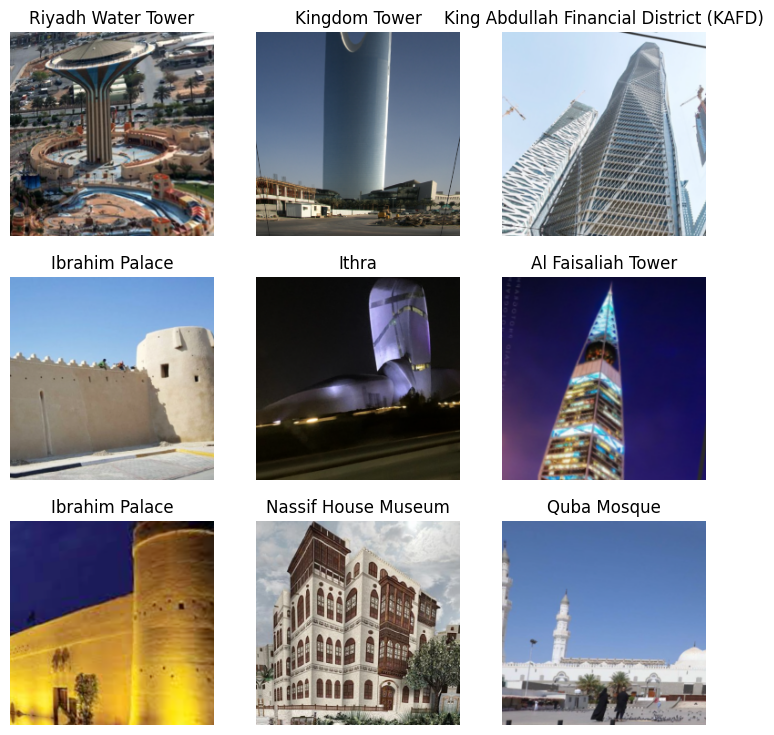

In [12]:
dataloader.show_batch()

# Training the Model

In [13]:
learn = vision_learner(dataloader, resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 129MB/s]


SuggestedLRs(valley=0.0020892962347716093)

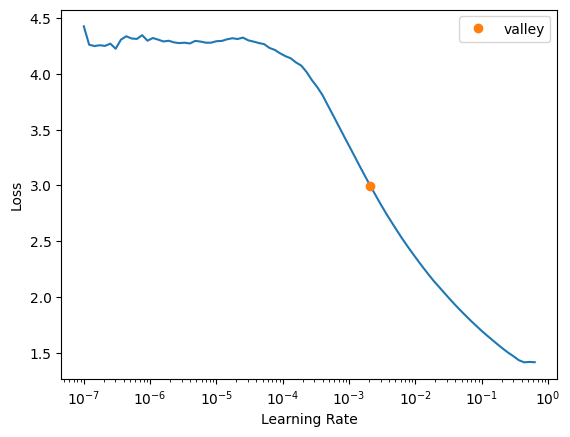

In [14]:
learn.lr_find()

In [15]:
learn.fine_tune(40, 1e-3)
# learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,3.865549,1.854581,0.531646,00:11


epoch,train_loss,valid_loss,error_rate,time
0,1.893787,1.329063,0.379747,00:12
1,1.667180,1.002608,0.240506,00:13
2,1.448897,0.715640,0.189873,00:10
3,1.240495,0.502564,0.126582,00:12
4,1.063877,0.337912,0.101266,00:12
5,0.913402,0.230378,0.063291,00:11
6,0.779670,0.164164,0.050633,00:11
7,0.681810,0.136310,0.050633,00:10
8,0.591309,0.137472,0.037975,00:12
9,0.513230,0.150255,0.037975,00:11


# Model Export and Results Display

In [16]:
learn.export('SaudiLandmarkClassifier.pkl')

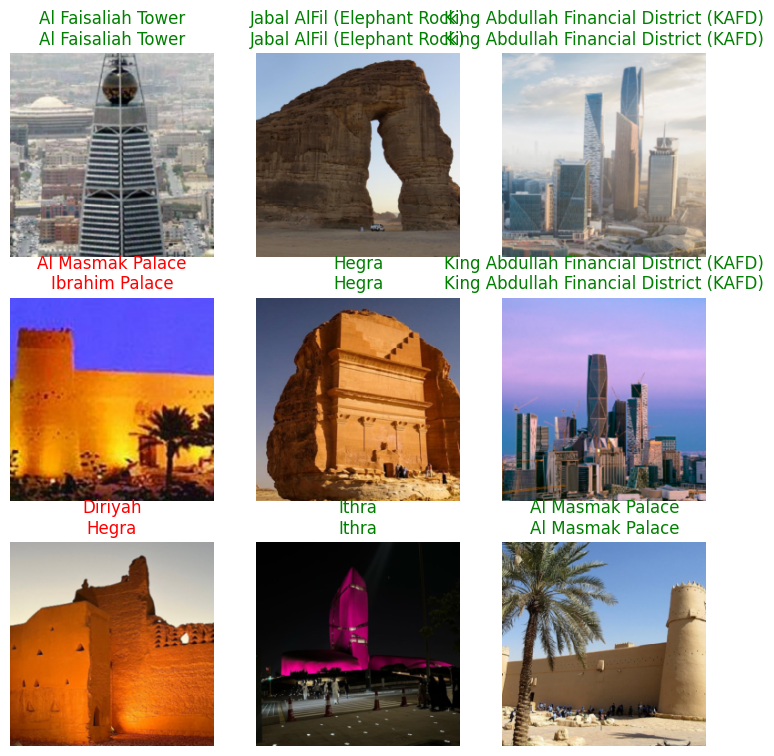

In [17]:
learn.show_results()

In [ ]:
# learn = load_learner('/content/SaudiLandmarkClassifier.pkl')

In [ ]:
# prediction = learn.predict('/content/nassif house museum.jpg')
# prediction

# predicted_class = prediction[0]
# predicted_index = prediction[1]
# probabilities = prediction[2]

# # Getting the probability of the predicted class
# probability_of_predicted_class = probabilities[predicted_index].item()  # .item() converts a single-value tensor to a Python number

# print(f"Predicted Class: {predicted_class}")
# print(f"Probability of Predicted Class: {probability_of_predicted_class}")

Predicted Class: Nassif House Museum
Probability of Predicted Class: 0.9997925162315369


# Model Interpretation and Analysis

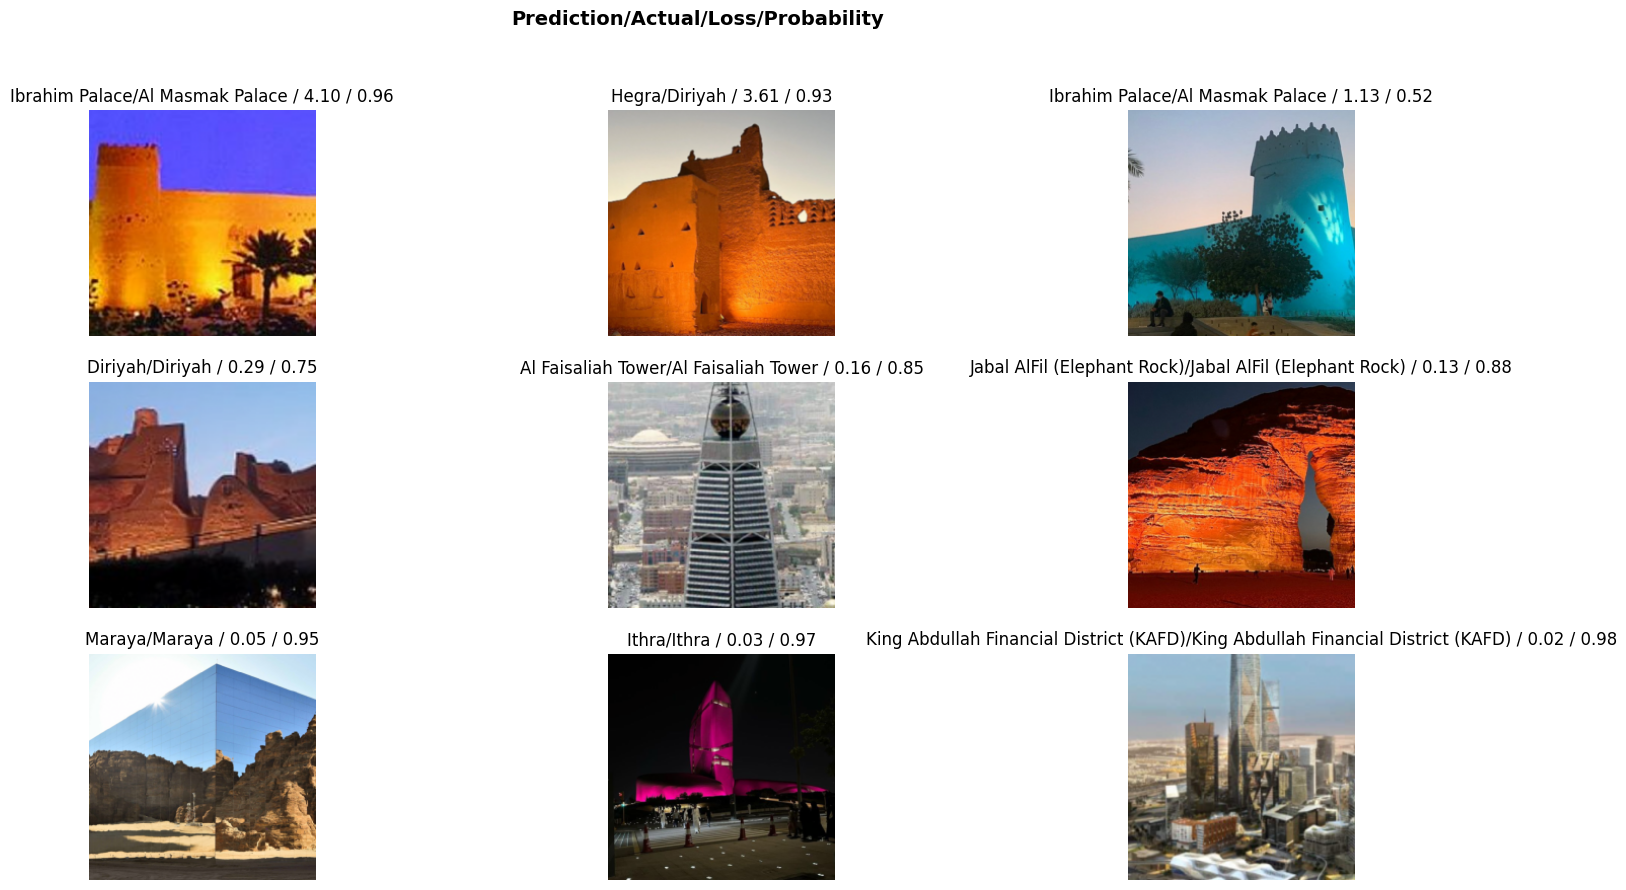

In [18]:
interp = Interpretation.from_learner(learn)

# Plot top losses
interp.plot_top_losses(9, figsize=(19,10))

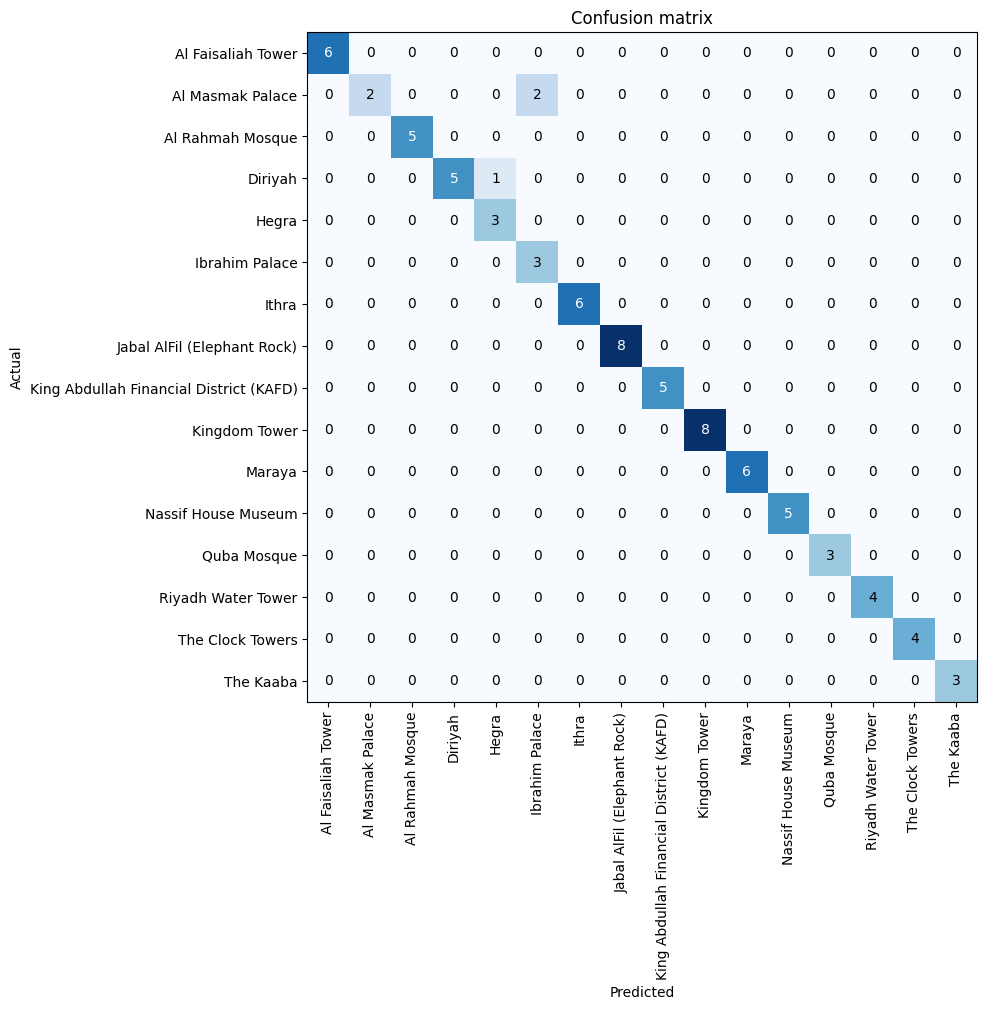

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(19,10))